In [13]:
!pip -q install pydub
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from pydub import AudioSegment
from io import BytesIO
import soundfile as sf
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [14]:
class AudioSignal:
    @staticmethod
    def __record(file_name, sec=3):
        RECORD = """
        const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
        const b2text = blob => new Promise(resolve => {
          const reader = new FileReader()
          reader.onloadend = e => resolve(e.srcElement.result)
          reader.readAsDataURL(blob)
        })
        var record = time => new Promise(async resolve => {
          stream = await navigator.mediaDevices.getUserMedia({ audio: true })
          recorder = new MediaRecorder(stream)
          chunks = []
          recorder.ondataavailable = e => chunks.push(e.data)
          recorder.start()
          await sleep(time)
          recorder.onstop = async ()=>{
            blob = new Blob(chunks)
            text = await b2text(blob)
            resolve(text)
          }
          recorder.stop()
        })
        """
        display(Javascript(RECORD))
        s = output.eval_js('record(%d)' % (sec*1000))
        b = b64decode(s.split(',')[1])
        audio = AudioSegment.from_file(BytesIO(b))
        audio.export(file_name, format='wav', parameters=["-ar", "8000"])
        return audio

    def __init__(self, file_name):
        self.sample_rate = 8000
        self.file_name = file_name

    def record(self, sec):
        self.audioSegment = self.__record(self.file_name, sec)
        return self.audioSegment

    def read(self):
        self.y, self.sample_rate = sf.read(self.file_name)
        return self.y

In [21]:
#записываем речь
my_voice = AudioSignal('my_voice.wav')
my_voice.record(3)

<IPython.core.display.Javascript object>

In [22]:
audio = my_voice.read()

Строим график массива аудио


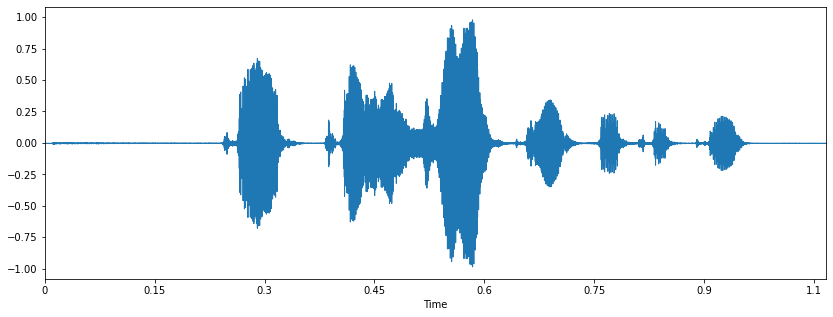

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio)

Строим кратковременное преобразование Фурье

In [24]:
sp = np.abs(librosa.stft(audio))



Преобразуем в Дб

In [25]:
sp_db = librosa.amplitude_to_db(sp, ref=np.max)

Строим спектрограмму

Text(0.5, 1.0, 'Spectrogram')

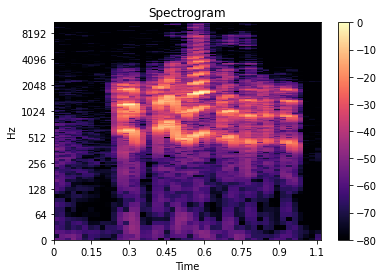

In [26]:
librosa.display.specshow(sp_db, x_axis='time', y_axis='log' )
plt.colorbar()
plt.title('Spectrogram')